In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.optimize import minimize

sns.set(context="talk")

In [105]:
data = loadmat("ex3data1.mat")
X = data["X"]
print("X matrix shape =", data["X"].shape, "\n", X)
y = data["y"]
print("y matrix shape =", data["y"].shape, "\n", y)

X matrix shape = (5000, 400) 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
y matrix shape = (5000, 1) 
 [[10]
 [10]
 [10]
 ..., 
 [ 9]
 [ 9]
 [ 9]]


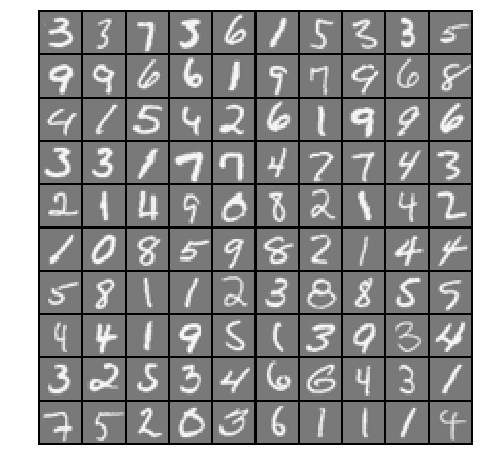

In [109]:
def displayData(X, ex_width=20):
    # Compute rows, cols
    m, n = X.shape
    ex_height = n / ex_width
    # Compute number of items to display
    disp_rows = np.floor(np.sqrt(m))
    disp_cols = np.ceil(m/disp_rows)
    # Between images padding
    pad = 1
    # Setup blank display
    disp_array = -np.ones((int(pad + disp_rows*(ex_height + pad)), int(pad + disp_cols*(ex_width + pad))))
    curr_ex = 0
    for i in range(int(disp_rows)):
        for j in range(int(disp_cols)):
            if curr_ex == m:
                break
            max_val = np.max(np.abs((X[0,:])))
            disp_array[int(pad + i*(ex_height+pad)): int(pad + i*(ex_height+pad) + ex_height), \
                       int(pad + j*(ex_width+pad)): int(pad + j*(ex_width+pad) + ex_width)] \
            = X[curr_ex, :].reshape(int(ex_height), int(ex_width)).T
            curr_ex = curr_ex + 1
        if curr_ex == m:
            break
    plt.figure(figsize=(8, 8))
    plt.imshow(disp_array, cmap="gray")
    plt.axis("off")
    plt.show()
    
# Randomly select 100 data points to display
ramdom_indices = np.random.choice(range(5000), 100)
sample = X[ramdom_indices, :]
displayData(sample)

**Define hypothesis and cost function**

In [ ]:
# Logistic regression function
def hypo(theta, X):
    h = 1 / (1 + np.exp(-X.dot(theta)))
    return h.reshape((-1, 1))

# Cost function
def costFun(theta, X, y, lamb=0):
    m = len(y)
    h = hypo(theta, X)
    return 1/m * np.sum(-y*np.log(h) - (1-y)*np.log(1-h)) + lamb/(2*m) * np.sum(theta[1:]**2)

# Gradient function
def gradient(theta, X, y, lamb=0):
    m = len(y)
    h = hypo(theta, X)
    gradient = 1/m * (h - y).T.dot(X).T
    gradient[1:, 0] = gradient[1:, 0] + (lamb/m*theta[1:])
    return gradient.ravel()

# Map Feature
def mapFeature(X, degree=1):
    if X.ndim == 1:
        X = X.reshape(1, -1)
    nrows = X.shape[0]
    ncols = int((degree+2)*(degree+1)/2)
    mapX = np.ones((nrows, ncols))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            mapX[:, int((i+1)*i/2)+j] = (X[:, 0]**(i-j))*(X[:, 1]**j)
    return mapX

X = df.values[:, 0:len(df.columns)-1]
degree = 6
X = mapFeature(X, degree)
y = df.values[:, len(df.columns)-1:len(df.columns)]
theta = np.zeros([X.shape[1]])

**Minimize cost function and find learned parameters theta**

In [ ]:
lamb = 1
res = minimize(costFun, theta, args=(X, y, lamb), jac=gradient, method="TNC")
print(res)

**Plot decision boundary with scatter plot of data**

In [ ]:
# Plot scatter
sns.lmplot(x="Test1", y="Test2", data=df,
           fit_reg=False, # No regression line, 
           hue="Accepted",
           size=6, # Height in inch
           aspect=1.25)  # Ratio of width to height
# Plot decision line
x_plot = np.linspace(df.Test1.min(), df.Test1.max(), 100)
y_plot = np.linspace(df.Test2.min(), df.Test2.max(), 100)
z_plot = np.zeros((len(x_plot), len(y_plot)))
for i in range(len(x_plot)):
    for j in range(len(y_plot)):
        x_predict = np.array([x_plot[i], y_plot[j]])
        x_predict = mapFeature(x_predict, degree)
        z_plot[i, j] = hypo(res.x, x_predict).ravel()[0]
plt.contour(x_plot, y_plot, z_plot.T, [0.5], colors="red")
plt.show()

**Evaluating logistic regression**

In [ ]:
def predict(theta, X):
    return (hypo(theta, X)>=0.5).astype(np.float)

accuracy = np.mean((predict(res.x, X)==y).astype(np.float))
print("Accuracy = {0}%".format(accuracy*100))